In [52]:
#Import Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as sps

import statsmodels.formula.api as smf
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

In [69]:
# Load the csv data into pandas dataframe
df = pd.read_csv('coursework_1_data_2019.csv')

# Normalized response variable data: annual total / female / male / 10-year difference per capita cases
df['y08'] = 100*df['2008_cases_total']/df['2008_pop_total']
df['y13'] = 100*df['2013_cases_total']/df['2013_pop_total']
df['y18'] = 100*df['2018_cases_total']/df['2018_pop_total']

df['yf08'] = 100*df['2008_cases_female']/df['2008_pop_female']
df['yf13'] = 100*df['2013_cases_female']/df['2008_pop_female']
df['yf18'] = 100*df['2018_cases_female']/df['2008_pop_female']

df['ym08'] = 100*df['2008_cases_male']/df['2008_pop_male']
df['ym13'] = 100*df['2013_cases_male']/df['2008_pop_male']
df['ym18'] = 100*df['2018_cases_male']/df['2008_pop_male']

df['yfm08'] = 100*df['2008_cases_female']/df['2008_pop_male']
df['yfm13'] = 100*df['2013_cases_female']/df['2008_pop_male']
df['yfm18'] = 100*df['2018_cases_female']/df['2008_pop_male']

df['r08'] = df['yf08']/df['ym08']
df['r13'] = df['yf13']/df['ym13']   # has inf
df['r18'] = df['yf18']/df['ym18']

df['y_'] = df['y18'] - df['y08']
df['yf_'] = df['yf18'] - df['yf08']
df['ym_'] = df['ym18'] - df['ym08']

# Normalized predictor variable data
df['x1'] = 100* df['clean_air']/df['total_budget']
df['x2'] = 100* df['clean_environ']/df['total_budget']
df['x3'] = 100* df['health_training']/df['total_budget']
df['x4'] = 100* df['school_awareness']/df['total_budget']
df['x5'] = 100* df['media_awareness']/df['total_budget']
df['x6'] = 100* df['sub_counselling']/df['total_budget']

# Categorical predictor variables, need dummy variables for multiple regression
# df['region']: 9 regions: xr1, xr2, xr3, xr4, xr5...
# df['local_authority_type']: 5 categories of local authority: xa1, xa2, xa3, xa4, xa5

df.describe()
df.shape

(152, 52)

Text(0.5, 1.0, 'Figure 2b: Case rate change (2008-2018) in local authority areas')

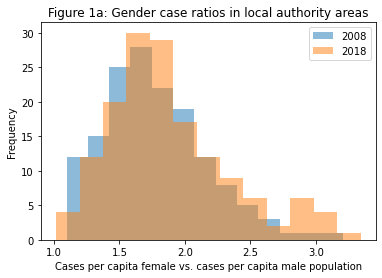

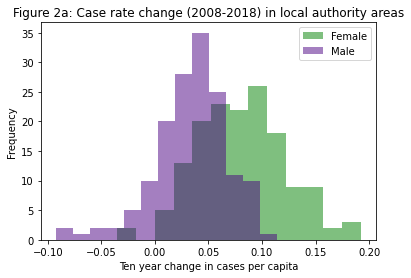

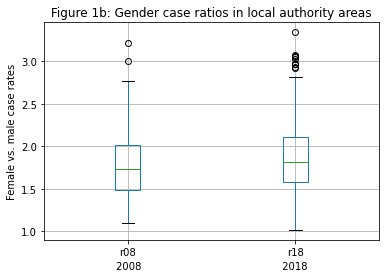

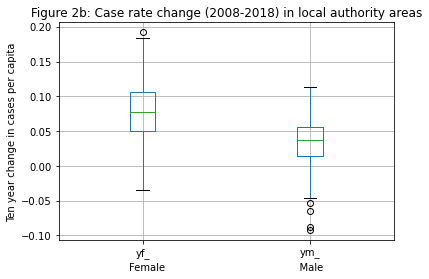

In [55]:
plt.figure(1)
df['r08'].plot.hist(bins=13, alpha = 0.5)
df['r18'].plot.hist(bins=13, alpha = 0.5)
plt.xlabel('Cases per capita female vs. cases per capita male population')
plt.legend(['2008', '2018'])
plt.title('Figure 1a: Gender case ratios in local authority areas')

plt.figure(2)
df['yf_'].plot.hist(bins=13, alpha = 0.5, color= 'g')
df['ym_'].plot.hist(bins=13, alpha = 0.5, color= 'indigo')
plt.xlabel('Ten year change in cases per capita')
plt.legend(['Female', 'Male'])
plt.title('Figure 2a: Case rate change (2008-2018) in local authority areas')

plt.figure(4)
df.boxplot(column=['r08','r18'])
plt.ylabel('Female vs. male case rates')
plt.xlabel('2008                                             2018')
plt.title('Figure 1b: Gender case ratios in local authority areas')

plt.figure(5)
df.boxplot(column=['yf_','ym_'])
plt.ylabel('Ten year change in cases per capita')
plt.xlabel('Female                                           Male')
plt.title('Figure 2b: Case rate change (2008-2018) in local authority areas')
           


Text(0.5, 1.0, 'Figure 3b: Percent budget for interventions in local authority areas')

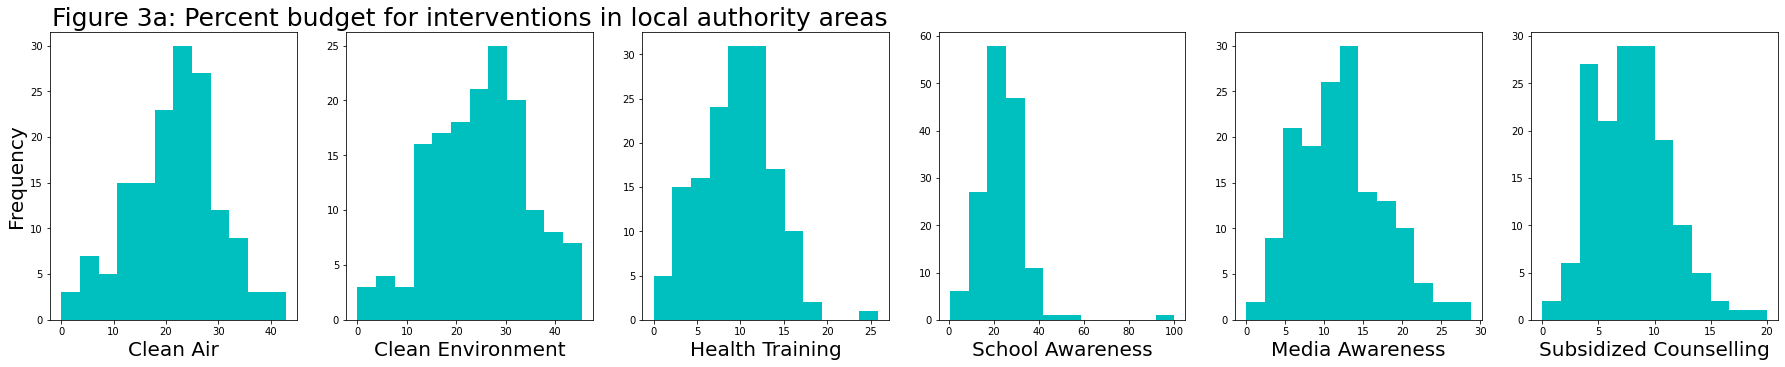

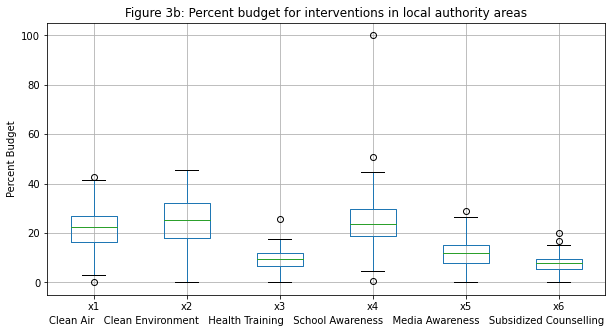

In [70]:
plt.figure(3)
plt.subplot(161)
df['x1'].plot.hist(bins=12, color= 'c')
plt.xlabel('Clean Air', size = 20)
plt.ylabel('Frequency', size = 20)
plt.subplot(162)
df['x2'].plot.hist(bins=12, color= 'c')
plt.xlabel('Clean Environment', size = 20)
plt.ylabel('', size = 1)
plt.title('Figure 3a: Percent budget for interventions in local authority areas', size = 25)
plt.subplot(163)
df['x3'].plot.hist(bins=12, color= 'c')
plt.xlabel('Health Training', size = 20)
plt.ylabel('', size = 1)
plt.subplot(164)
df['x4'].plot.hist(bins=12, color= 'c')
plt.xlabel('School Awareness', size = 20)
plt.ylabel('', size = 1)
plt.subplot(165)
df['x5'].plot.hist(bins=12, color= 'c')
plt.xlabel('Media Awareness', size = 20)
plt.ylabel('', size = 1)
plt.subplot(166)
df['x6'].plot.hist(bins=12, color= 'c')
plt.xlabel('Subsidized Counselling', size = 20)
plt.ylabel('', size = 1)
plt.subplots_adjust(left=0, bottom=0, right=4, top=1, wspace=0.2, hspace=1)

plt.figure(6, figsize = (10, 5))  
df.boxplot(column=['x1','x2','x3','x4','x5','x6'])
plt.ylabel('Percent Budget')
plt.xlabel('Clean Air   Clean Environment   Health Training   School Awareness   Media Awareness   Subsidized Counselling')                
plt.title('Figure 3b: Percent budget for interventions in local authority areas')

In [71]:
# Remove Outliers, redefining df
# Code adapted from https://www.askpython.com/python/examples/detection-removal-outliers-in-python

list = ['r08', 'r18', 'yf_' , 'ym_', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']

for col in list:
    IQR = sps.iqr(df[col])      
    Q1 = np.quantile(df[col], q= 0.25)
    Q3 = np.quantile(df[col], q= 0.75)
    lo = Q1- (1.5*IQR)
    hi = Q3+ (1.5*IQR)
    
    df.loc[df[col] < lo, col] = np.nan
    df.loc[df[col] > hi, col] = np.nan

df = df.dropna()
df.shape
print(132/152.000)

0.868421052631579


In [72]:
# Mean Comparison Test (t-test) adapted from ____
# H0: Sample 1 and Sample 2 are drawn from identical distributions.
# H1: Sample 1 and Sample 2 are not drawn from identical distributions.
# Samples should be from populations with the same standard deviation; neither standard deviation is double the other.

def compare_means(s1, s2, alpha = 0.05):
    std_ratio = s1.std() / s2.std()
    if std_ratio > 0.5 and std_ratio < 2:
        print("Can assume equal population standard deviations.")
        equal_stds = True
    else:
        print("Cannot assume equal population standard deviations.")
        equal_stds = False
    

    test_stat, p_value = sps.ttest_ind(s1, s2, equal_var = equal_stds)
    if p_value < alpha:
        print(f"p-value {p_value} < significance threshold {alpha}.")
        print("Reject H0. Accept H1. Conclude that samples are drawn from populations with different means.")
    elif p_value >= alpha:
        print(f"p-value {p_value} >= significance threshold {alpha}.")
        print("No significant evidence to reject H0. Assume samples are drawn from populations with the same mean.")
    
    print("Means:", s1.mean(), s2.mean())

In [73]:
s1 = df['r08']
s2 = df['r18']
compare_means(s1, s2, alpha = 0.05)

Can assume equal population standard deviations.
p-value 0.1982643009585694 >= significance threshold 0.05.
No significant evidence to reject H0. Assume samples are drawn from populations with the same mean.
Means: 1.7352584408629639 1.7927552164617746


In [74]:
s1 = df['yf_']
s2 = df['ym_']
compare_means(s1, s2, alpha = 0.05)

Can assume equal population standard deviations.
p-value 1.6703588271805882e-18 < significance threshold 0.05.
Reject H0. Accept H1. Conclude that samples are drawn from populations with different means.
Means: 0.08013869990630554 0.040746974730639623


(0.4234225909049033, 4.225258251330198e-07)


<Figure size 720x360 with 0 Axes>

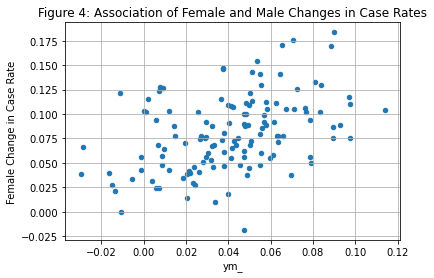

In [136]:
print(sps.pearsonr(df['yf_'], df['ym_']))
plt.figure(7, figsize = (10, 5))  
df.plot.scatter(x='ym_', y='yf_')
#plt.plot(df['ym_'], df['yf_'], '.')
plt.ylabel('Female Change in Case Rate')
plt.title('Figure 4: Association of Female and Male Changes in Case Rates')
plt.grid(True, which='both')

#ax.set_xlabel("x label")
#ax = df2.plot(lw=2, colormap='jet', marker='.', markersize=10, title='Video streaming dropout by category')
#ax.set_xlabel("x label")
#ax.set_ylabel("y label")



In [ ]:
print(sps.pearsonr(df['y_'], df['x1']))   #30%
print(sps.pearsonr(df['y_'], df['x2']))
print(sps.pearsonr(df['y_'], df['x3']))
print(sps.pearsonr(df['y_'], df['x4']))     
print(sps.pearsonr(df['y_'], df['x5']))    #25%
print('')
print(sps.pearsonr(df['yf_'], df['x1']))   # -16%
print(sps.pearsonr(df['yf_'], df['x2']))
print(sps.pearsonr(df['yf_'], df['x3']))
print(sps.pearsonr(df['yf_'], df['x4']))     
print(sps.pearsonr(df['yf_'], df['x5']))     # 19% 
print('')
print(sps.pearsonr(df['ym_'], df['x1']))   
print(sps.pearsonr(df['ym_'], df['x2']))    # -25
print(sps.pearsonr(df['ym_'], df['x3']))    
print(sps.pearsonr(df['ym_'], df['x4']))     
print(sps.pearsonr(df['ym_'], df['x5']))     # 18.5%

female vs  x1
y = -0.001 x + 0.095
Rsq =  0.02063
p-value =  0.1004

male vs  x1
y = 0.0 x + 0.04
Rsq =  0.0002
p-value =  0.8735

female vs  x2
y = -0.0 x + 0.081
Rsq =  3e-05
p-value =  0.9534

male vs  x2
y = -0.0 x + 0.048
Rsq =  0.00775
p-value =  0.3154

female vs  x3
y = 0.0 x + 0.078
Rsq =  0.00071
p-value =  0.7615

male vs  x3
y = -0.0 x + 0.042
Rsq =  0.00023
p-value =  0.8627

female vs  x4
y = -0.0 x + 0.087
Rsq =  0.0036
p-value =  0.4946

male vs  x4
y = -0.0 x + 0.051
Rsq =  0.01209
p-value =  0.2095

female vs  x5
y = 0.002 x + 0.057
Rsq =  0.06776
p-value =  0.0026

male vs  x5
y = 0.001 x + 0.024
Rsq =  0.06038
p-value =  0.0045

female vs  x6
y = 0.001 x + 0.074
Rsq =  0.00428
p-value =  0.4562



/tmp/ipykernel_707/3328499720.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axs[0,i].plot(df[w], df[w]*slope + intercept, 'r', label = 'fitted line', c='tab:orange')
/tmp/ipykernel_707/3328499720.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axs[0,i].plot(df[w], df[w]*slope + intercept, 'r', label = 'fitted line', c='tab:orange')
/tmp/ipykernel_707/3328499720.py:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  axs[0,i].plot(df[w], df[w]*slope + intercept, 'r', label = 'fitted line', c='tab:orange')
/tmp/ipykernel_707/3328499720.py:25: UserWarning: color is redundantly defined by the 'color' keywor

male vs  x6
y = 0.001 x + 0.033
Rsq =  0.00998
p-value =  0.2544



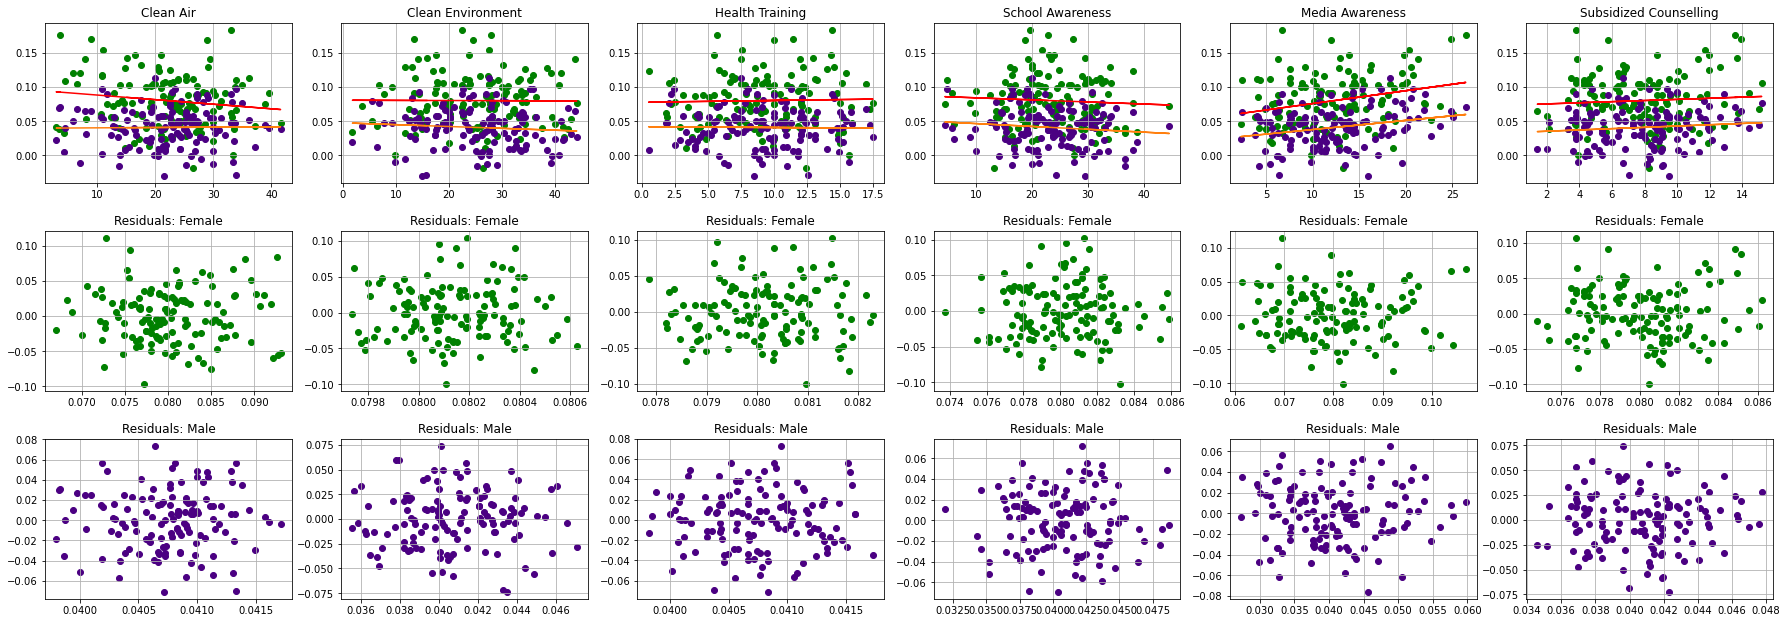

In [138]:
# source the lesson!!!!!

list2 = [[0,'x1'], [1,'x2'], [2,'x3'], [3,'x4'], [4,'x5'], [5,'x6']]
fig1, axs = plt.subplots(3, 6)

for i,w in list2:
    slope, intercept, r_value, p_value, std_err = sps.linregress(x=df[w], y=df['yf_']) 
    axs[0,i].scatter(x=df[w], y=df['yf_'], c='g')
    axs[0,i].plot(df[w], df[w]*slope + intercept, 'r', label = 'fitted line')
    axs[0,i].grid(True, which='both')
        
    yhat = slope * df[w] + intercept
    axs[1,i].scatter(yhat, df['yf_']-yhat, c='g')
    plt.subplots_adjust(left=0, bottom=0, right=3, top=1, wspace=.2, hspace=0.2)
    axs[1,i].grid(True, which='both')
    
    print('female vs ',w)
    print("y =", round(slope,3), "x +", round(intercept,3))
    print("Rsq = ", round(r_value**2, 5))
    print("p-value = ", round(p_value, 4))
    print("")
    
    slope, intercept, r_value, p_value, std_err = sps.linregress(x=df[w], y=df['ym_']) 
    axs[0,i].scatter(x=df[w], y=df['ym_'], c='indigo')
    axs[0,i].plot(df[w], df[w]*slope + intercept, 'r', label = 'fitted line', c='tab:orange')
       
    yhat = slope * df[w] + intercept
    axs[2,i].scatter(yhat, df['ym_']-yhat, c='indigo')
    plt.subplots_adjust(left=0, bottom=0, right=3, top=1, wspace=.2, hspace=0.2)
    axs[2,i].grid(True, which='both')
    
    print('male vs ',w)
    print("y =", round(slope,3), "x +", round(intercept,3))
    print("Rsq = ", round(r_value**2, 5))
    print("p-value = ", round(p_value, 4))
    print("")
    
axs[0,0].title.set_text('Clean Air')
axs[0,1].title.set_text('Clean Environment')
axs[0,2].title.set_text('Health Training')
axs[0,3].title.set_text('School Awareness')
axs[0,4].title.set_text('Media Awareness')
axs[0,5].title.set_text('Subsidized Counselling')

axs[1,0].title.set_text('Residuals: Female')
axs[1,1].title.set_text('Residuals: Female')
axs[1,2].title.set_text('Residuals: Female')
axs[1,3].title.set_text('Residuals: Female')
axs[1,4].title.set_text('Residuals: Female')
axs[1,5].title.set_text('Residuals: Female')

axs[2,0].title.set_text('Residuals: Male')
axs[2,1].title.set_text('Residuals: Male')
axs[2,2].title.set_text('Residuals: Male')
axs[2,3].title.set_text('Residuals: Male')
axs[2,4].title.set_text('Residuals: Male')
axs[2,5].title.set_text('Residuals: Male')

plt.subplots_adjust(left=0, bottom=0, right=4, top=2, wspace=0.2, hspace=.3)

#for ax in axs.flat:
 #   ax.label_outer()

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [13]:
#df.columns

In [124]:
df2 = df.loc[:, 'y_':]

Text(0.5, 1.0, 'Correlation Matrix')

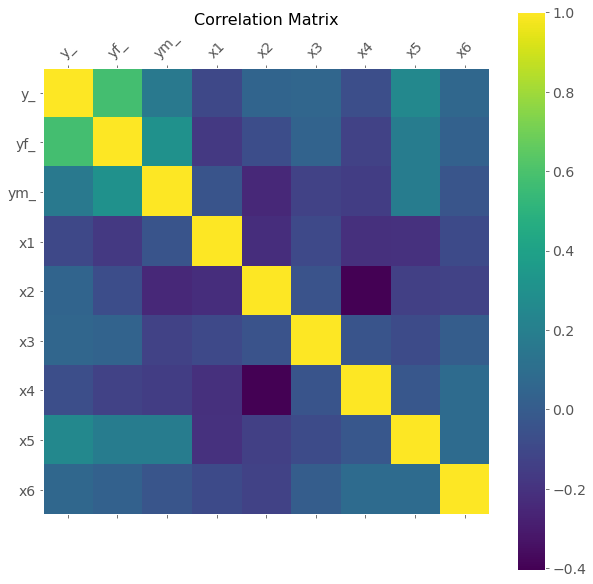

In [18]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(10, 10))
plt.matshow(df2.corr(), fignum=f.number)
plt.xticks(range(df2.shape[1]), df2.columns, fontsize=14, rotation=45)
plt.yticks(range(df2.shape[1]), df2.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [30]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

In [24]:
# source!!!!!

def drop_column_using_vif(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, 
        it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constant item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. 
        #This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [125]:
df3 = df2.loc[:, 'x1':]
df35 = df3.drop(columns=['x1', 'x3', 'x4'])
df4 = drop_column_using_vif(df35)

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [126]:
model = sm.OLS(endog=df2[['ym_']], exog=sm.add_constant(df4)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ym_   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     4.427
Date:                Sun, 14 Nov 2021   Prob (F-statistic):            0.00529
Time:                        00:54:12   Log-Likelihood:                 303.35
No. Observations:                 140   AIC:                            -598.7
Df Residuals:                     136   BIC:                            -586.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0518      0.011      4.618      0.000       0.030       0.074
x2            -0.0009      0.000     -2.797      0.006      -0.002      -0.000
x5             0.0011      0.001      1.917      0.057   -3.54e-05       0.002
x6            -0.0009      0.001     -0.933      0.352      -0.003       0.001
==============================================================================
Omnibus:                        0.041   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.980   Jarque-Bera (JB):                0.150
Skew:                          -0.032   Prob(JB):                        0.928
Kurtosis:                       2.853   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
model = sm.OLS(endog=df2[['ym_']], exog=sm.add_constant(df4)).fit()
model.summary()

/opt/conda/envs/sds2021/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ym_   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     6.070
Date:                Fri, 12 Nov 2021   Prob (F-statistic):           1.22e-05
Time:                        23:45:57   Log-Likelihood:                 313.77
No. Observations:                 140   AIC:                            -613.5
Df Residuals:                     133   BIC:                            -592.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1381      0.022      6.194      0.000       0.094       0.182
x1            -0.0004      0.000     -2.653      0.009      -0.001   -9.07e-05
x2            -0.0006      0.000     -4.920      0.000      -0.001      -0.000
x3            -0.0006      0.000     -2.271      0.025      -0.001   -7.43e-05
x4            -0.0006      0.000     -4.183      0.000      -0.001      -0.000
x5             0.0001      0.000      0.674      0.502      -0.000       0.001
x6            -0.0003      0.000     -1.058      0.292      -0.001       0.000
==============================================================================
Omnibus:                        0.416   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.812   Jarque-Bera (JB):                0.565
Skew:                          -0.010   Prob(JB):                        0.754
Kurtosis:                       2.689   Cond. No.                     1.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#adjusted r-sq, t test, f test, residuals
#adjusted r-sq for simple regression?

# plot 
plt.scatter(model_bike_rental.fittedvalues, model_bike_rental.resid)
# adding title and labels
plt.xlabel('Fitted bike rental')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of bike rental')
plt.show()

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_bike_rental, 'windspeed', fig=fig)